## __EDA on Twitter Data__


#### Read in and Preview Dataset: 

In [ ]:
import pandas as pd

df = pd.read_csv('/Users/veeraanand/Documents/Career/Experiences/UChicago MS-ADS/2024-2025_MS Program/2025 Summer/ML Ops/Final/time_series_backtesting_data_all_tweets_merged_taehyung.csv')
print(df.head())

                    id                 created_at  \
0  1860150811340472527  2024-11-23 02:38:08+00:00   
1  1860153466435604760  2024-11-23 02:48:41+00:00   
2  1860292584804888673  2024-11-23 12:01:29+00:00   
3  1860322534308086224  2024-11-23 14:00:29+00:00   
4  1860347396850409531  2024-11-23 15:39:17+00:00   

                                                text          creator  \
0  RT @gmekhail: Stoked to watch NFL legends comp...  BitcoinMagazine   
1  JUST IN: BlackRock's spot #Bitcoin ETF had $50...  BitcoinMagazine   
2  NEW: 🇺🇸 #Bitcoin ETFs recorded weekly net infl...  BitcoinMagazine   
3  🇺🇸 Senator Cynthia Lummis: “#Bitcoin is an ess...  BitcoinMagazine   
4  JUST IN: MicroStrategy now has their $3 billio...  BitcoinMagazine   

   author_id fetched_at  token_count feature_timestamp   source  
0        NaN        NaN          NaN               NaN  gcs_csv  
1        NaN        NaN          NaN               NaN  gcs_csv  
2        NaN        NaN          NaN        

#### __Data Cleanup:__

In [24]:
# store shape before cleaning
original_shape = df.shape

# dropping duplicates if any
df = df.drop_duplicates()

# dropping rows where 'creator' or 'text' is missing
df = df.dropna(subset=['creator', 'text'])

# stripping any extra whitespace in 'creator' column
df['creator'] = df['creator'].str.strip()

# confirming shapes before and after cleaning
print("Original data shape: ", original_shape)
print("Cleaned data shape:  ", df.shape)

Original data shape:  (14584, 10)
Cleaned data shape:   (14584, 10)


Cleanup didn't alter dataset

#### __Counting the number of tweets per creator:__

In [ ]:
#number of tweets per creator
top_creators = df['creator'].value_counts().head(10)
print("Top 10 Creators by Tweet Count:")
print(top_creators)

Top 10 Creators by Tweet Count:
creator
elonmusk           4826
BTCTN              4281
BitcoinMagazine    3097
CoinDesk           2165
realDonaldTrump     137
BTC_Archive          78
Name: count, dtype: int64


In [ ]:
#confrmiing the number of unique creators in the dataset
print("Unique creators in dataset:", df['creator'].nunique())

Unique creators in dataset: 6


#### __Graphing the frequency of tweets from top creators:__

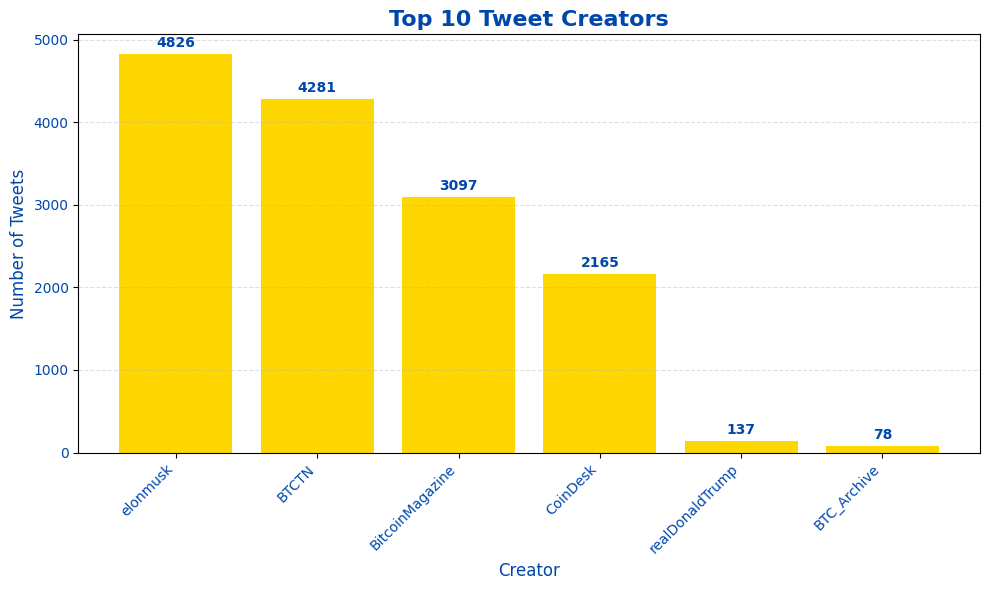

In [ ]:
import matplotlib.pyplot as plt

bar_color = '#FFD700'        
label_color = '#0047AB'     

plt.figure(figsize=(10, 6))
bars = plt.bar(top_creators.index, top_creators.values, color=bar_color)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{height}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color=label_color)

plt.title('Top 10 Tweet Creators', fontsize=16, fontweight='bold', color=label_color)
plt.xlabel('Creator', fontsize=12, color=label_color)
plt.ylabel('Number of Tweets', fontsize=12, color=label_color)
plt.xticks(rotation=45, ha='right', color=label_color)
plt.yticks(color=label_color)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### __Refining results:__

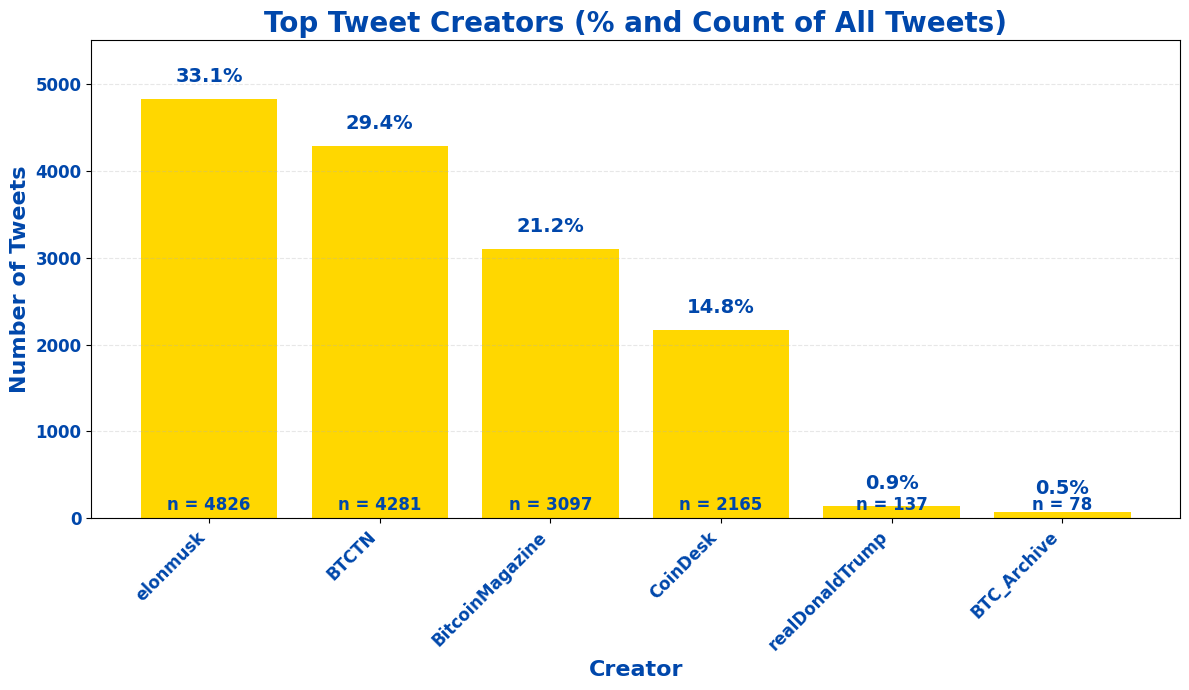

In [25]:
import matplotlib.pyplot as plt

total_tweets = df.shape[0]

bar_color = '#FFD700'      
label_color = '#0047AB'     

plt.figure(figsize=(12, 7))
bars = plt.bar(top_creators.index, top_creators.values, color=bar_color)

for bar in bars:
    count = bar.get_height()
    percent = (count / total_tweets) * 100

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        count + 200,
        f"{percent:.1f}%",
        ha='center',
        fontsize=14,
        fontweight='bold',
        color=label_color
    )

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        100,  # Low position
        f"n = {count}",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color=label_color
    )

plt.title('Top Tweet Creators (% and Count of All Tweets)', fontsize=20, fontweight='bold', color=label_color)
plt.xlabel('Creator', fontsize=16, fontweight='bold', color=label_color)
plt.ylabel('Number of Tweets', fontsize=16, fontweight='bold', color=label_color)

plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold', color=label_color)
plt.yticks(fontsize=12, fontweight='bold', color=label_color)
plt.ylim(top=5500)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### __Finding examples of positive, negative and mixed sentiment tweets:__

In [26]:
#adding a lowercase version of the tweet text for easier matching
df['text_lower'] = df['text'].str.lower()

#defining simple keyword lists
positive_keywords = ['great', 'love', 'awesome', 'excited', 'amazing', 'happy']
negative_keywords = ['worst', 'angry', 'hate', 'terrible', 'sad', 'awful']

#finding positive and negative tweet examples
positive_examples = df[df['text_lower'].str.contains('|'.join(positive_keywords), na=False)].head(3)
negative_examples = df[df['text_lower'].str.contains('|'.join(negative_keywords), na=False)].head(3)

print("\n Positive Sentiment Tweets:\n")
print(positive_examples[['creator', 'text']])
print("\n Negative Sentiment Tweets:\n")
print(negative_examples[['creator', 'text']])


 Positive Sentiment Tweets:

             creator                                               text
59   BitcoinMagazine  RT @frankcorva: If you're thinking about shill...
81   realDonaldTrump  Happy Thanksgiving to all, including to the Ra...
148  BitcoinMagazine  @TheBitcoinConf Get great deals on your favori...

 Negative Sentiment Tweets:

              creator                                               text
254   realDonaldTrump  Opposition fighters in Syria, in an unpreceden...
410   BitcoinMagazine  RT @brian_trollz: Jeremy Rubin has given us a ...
1128  BitcoinMagazine  RT @frankcorva: You don't have to quit your "f...


#### __Adjusting the code to include more examples:__

In [27]:
#lowercase version of tweet text for easier matching
df['text_lower'] = df['text'].str.lower()

#defining expanded keyword lists 
positive_keywords = ['great', 'love', 'awesome', 'excited', 'amazing', 'happy', 'best', 'fantastic', 'success', 'win']
negative_keywords = ['worst', 'angry', 'hate', 'terrible', 'sad', 'awful', 'scam', 'crash', 'fear', 'loss']

#filtering tweets that match each sentiment
positive_examples = df[df['text_lower'].str.contains('|'.join(positive_keywords), na=False)].head(10)
negative_examples = df[df['text_lower'].str.contains('|'.join(negative_keywords), na=False)].head(10)

print(" Positive Tweet Examples:")
for i, row in positive_examples.iterrows():
    print(f"- @{row['creator']}: {row['text']}\n")
print("\n Negative Tweet Examples:")
for i, row in negative_examples.iterrows():
    print(f"- @{row['creator']}: {row['text']}\n")

 Positive Tweet Examples:
- @BitcoinMagazine: #Bitcoin has dropped from $98,000 to under $95,000 since Jim Cramer said "own #Bitcoin, that's a winner." https://t.co/jS6eFGMQF4

- @BitcoinMagazine: JUST IN: 🇲🇦 Morocco to legalise #Bitcoin and crypto following the ban in 2017. https://t.co/Zv0Ii1JIO2

- @BitcoinMagazine: RT @frankcorva: If you're thinking about shilling #bitcoin at the Thanksgiving table tomorrow, please reconsider.

And if loved ones ask yo…

- @BitcoinMagazine: RT @wkkaung: In the highly divided society following the US election, understanding the true value of Bitcoin could be a bridge to unity. B…

- @realDonaldTrump: Happy Thanksgiving to all, including to the Radical Left Lunatics who have worked so hard to destroy our Country, but who have miserably failed, and will always fail, because their ideas and policies are so hopelessly bad that the great people of our Nation just gave a landslide

- @BitcoinMagazine: @BitcoinMagPro Introducing Bitkey, the hardware wallet